In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

import utils

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set()

In [2]:
# papermill parameter cell
update_figures = True
fig_size = (8,6)
fig_ext = "pdf"


In [3]:
df_confirmed = pd.concat([
    utils.load_file(Path("/Users/aliabbasjaffri/Documents/GitHub/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"))
])


In [4]:
df_deaths = pd.concat([
    utils.load_file(Path("/Users/aliabbasjaffri/Documents/GitHub/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"))
])


In [5]:
# df_recovered = pd.concat([
#     utils.load_file(Path("/Users/aliabbasjaffri/Documents/GitHub/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"))
# ])


In [6]:
def get_figures_by_country(df_val, country):
    df = df_val[df_val['Country'] == country]
    
    df = df.melt(id_vars=['Country', 'Province'],
                 var_name="Date", 
                 value_name="Confirmed")
    
    df['Date'] = pd.to_datetime(df.Date)
    df["Confirmed"] = df["Confirmed"].astype(int)
    return df

In [7]:
def separate_provincial_information(df):
    withoutPD = df.query('(Province.isnull())')
    withPD = df.query('(not Province.isnull())')
    
    withoutPD = withoutPD.pivot(index='Date', columns='Country')['Confirmed']
    
    withPD = withPD.pivot_table(index=['Date', 'Country'], columns='Province', values='Confirmed').unstack('Country').reset_index()
    withPD = withPD.dropna(axis=1, how='all')
    return withoutPD, withPD

In [8]:
countries = ['Pakistan', 'Germany', 'Iran', 'Italy', 'India', 'China', 'Australia'] 

country_data_confirmed = []
country_data_deaths = []
# country_data_recovered = []

for country in countries:
    country_data_confirmed.append(get_figures_by_country(df_confirmed, country))
    country_data_deaths.append(get_figures_by_country(df_deaths, country))
#     country_data_recovered.append(get_figures_by_country(df_recovered, country))

df_confirm = pd.concat(country_data_confirmed)
df_death = pd.concat(country_data_deaths)
# df_recover = pd.concat(country_data_recovered)




In [9]:
withoutPD_confirm, withPD_confirm = separate_provincial_information(df_confirm)
withoutPD_death, withPD_death = separate_provincial_information(df_death)
# withoutPD_recover, withPD_recover = separate_provincial_information(df_recover)


In [10]:
count_confirm = withoutPD_confirm[["Pakistan", "India"]]
count_death = withoutPD_death[["Pakistan", "India"]]


[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

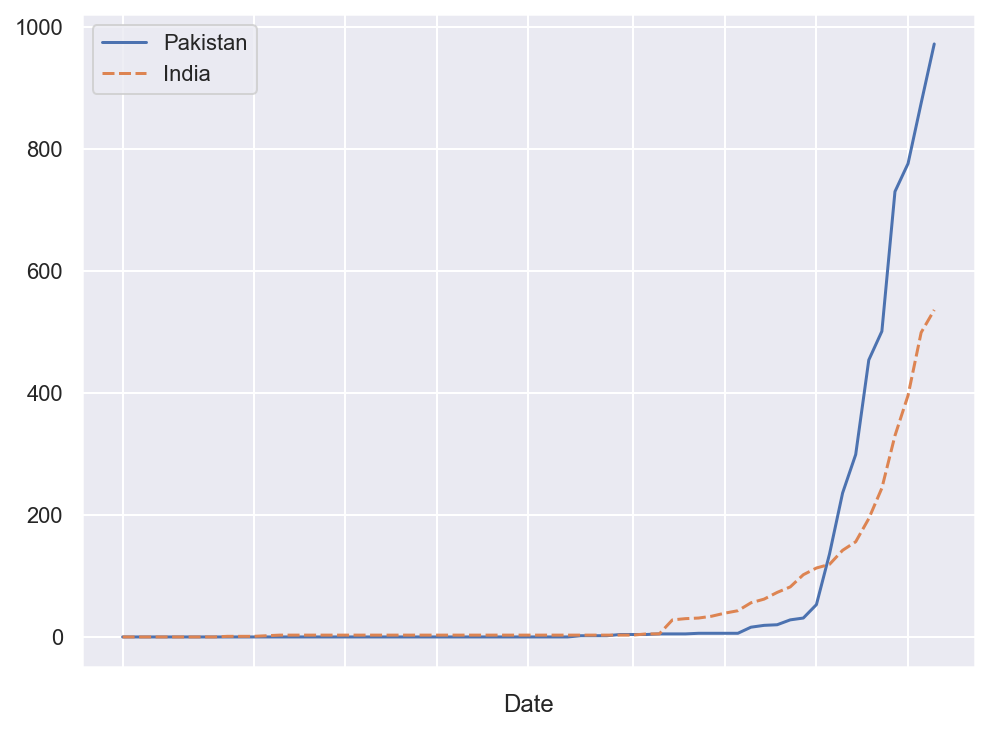

In [11]:
plt.figure(figsize=fig_size)

chart = sns.lineplot(data=count_confirm)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45
)


# update_figures and chart.savefig(f"../plots/local-single-node/ext4/imagenet_200k/small-image-files/imagenet_throughput.{fig_ext}", bbox_inches="tight");

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

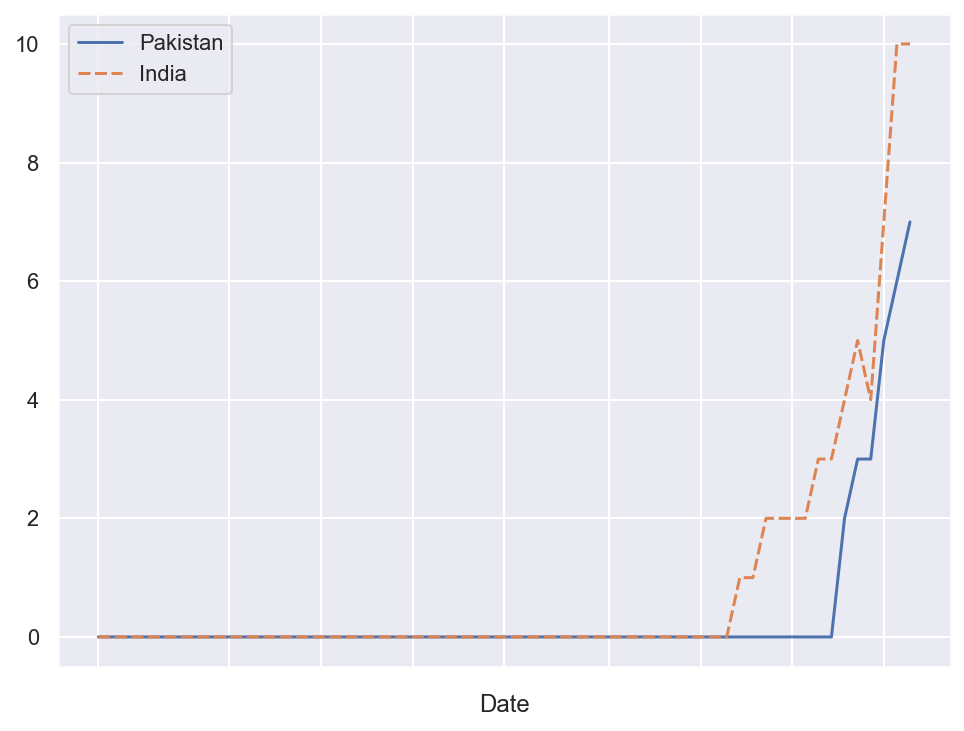

In [14]:
plt.figure(figsize=fig_size)

chart = sns.lineplot(data=count_death)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45
)


# update_figures and chart.savefig(f"../plots/local-single-node/ext4/imagenet_200k/small-image-files/imagenet_throughput.{fig_ext}", bbox_inches="tight");